線形回帰による予測

ライブラリのインポート

In [1]:
import sys #https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd
print("pandas version: {}". format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}". format(np.__version__))
import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print("sklearn version: {}". format(sklearn.__version__))

import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.16.5
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3
seaborn version: 0.9.0
sklearn version: 0.21.3
-------------------------


訓練用データの中身を見る

In [2]:
df = pd.read_csv('input/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


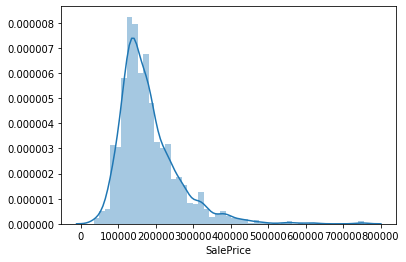

In [3]:
sns.distplot(df['SalePrice'])


 mu = 180921.20 and sigma = 79415.29



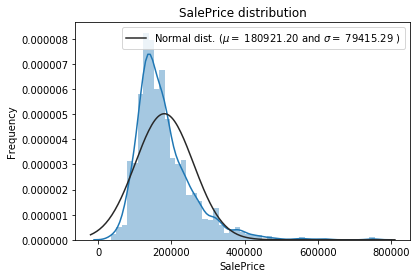

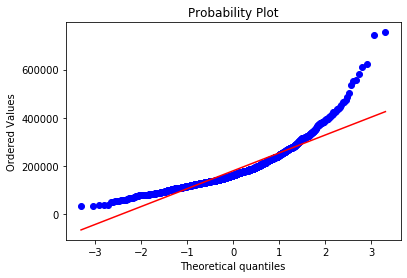

In [4]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

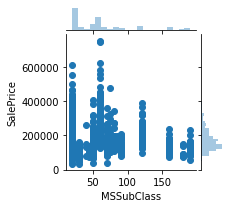

In [5]:
sns.jointplot(df.columns[1], df.columns[80], df, height=3)

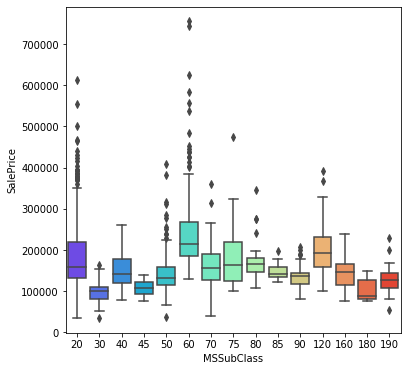

In [6]:
fig, qaxis = plt.subplots(figsize=(6,6))
sns.boxplot(df.columns[1], df.columns[80], data=df, palette='rainbow')

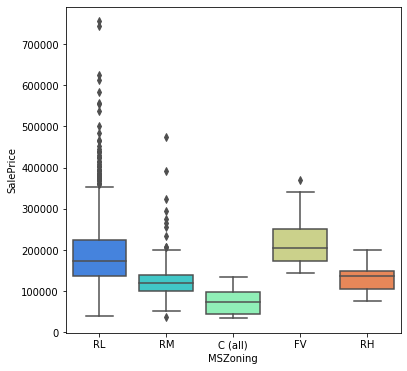

In [7]:
fig, qaxis = plt.subplots(figsize=(6,6))
sns.boxplot(df.columns[2], df.columns[80], data=df, palette='rainbow')

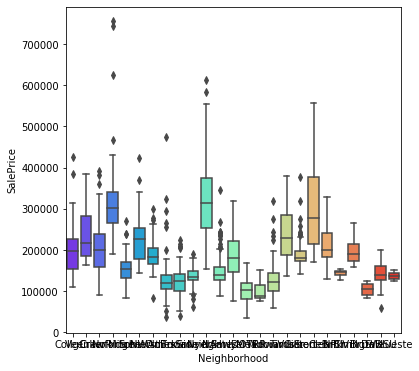

In [8]:
fig, qaxis = plt.subplots(figsize=(6,6))
sns.boxplot(df.columns[12], df.columns[80], data=df, palette='rainbow')

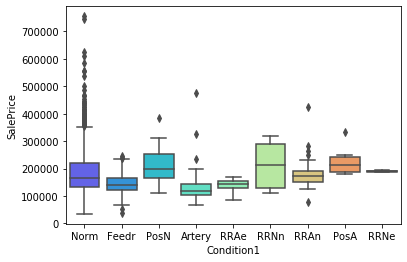

In [9]:
sns.boxplot(df.columns[13], df.columns[80], data=df, palette='rainbow')

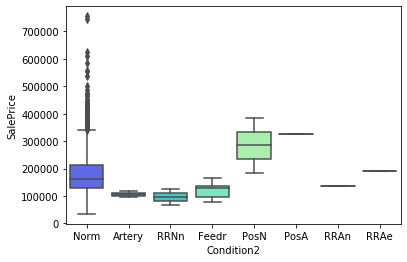

In [10]:
sns.boxplot(df.columns[14], df.columns[80], data=df, palette='rainbow')

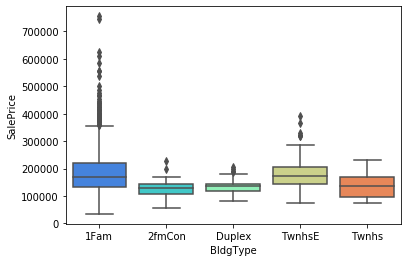

In [11]:
sns.boxplot(df.columns[15], df.columns[80], data=df, palette='rainbow')

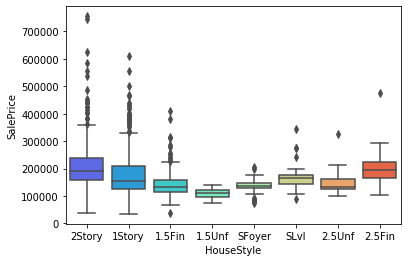

In [12]:
sns.boxplot(df.columns[16], df.columns[80], data=df, palette='rainbow')

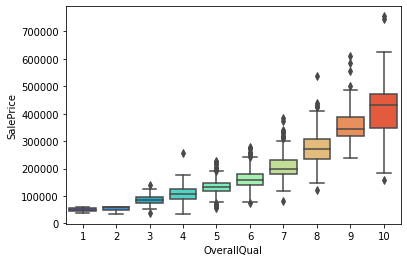

In [13]:
sns.boxplot(df.columns[17], df.columns[80], data=df, palette='rainbow')

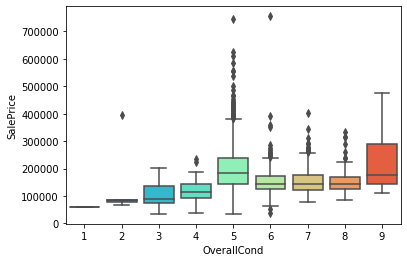

In [14]:
sns.boxplot(df.columns[18], df.columns[80], data=df, palette='rainbow')

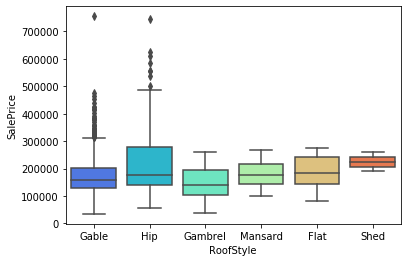

In [15]:
sns.boxplot(df.columns[21], df.columns[80], data=df, palette='rainbow')

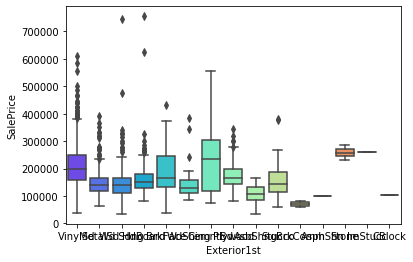

In [16]:
sns.boxplot(df.columns[23], df.columns[80], data=df, palette='rainbow')

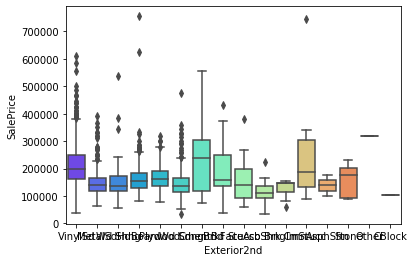

In [17]:
sns.boxplot(df.columns[24], df.columns[80], data=df, palette='rainbow')

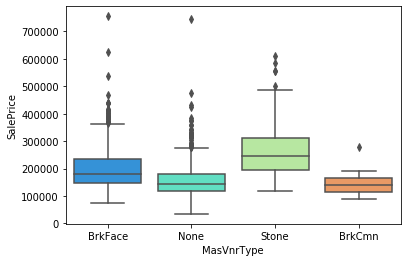

In [18]:
sns.boxplot(df.columns[25], df.columns[80], data=df, palette='rainbow')

0.4080867598152763

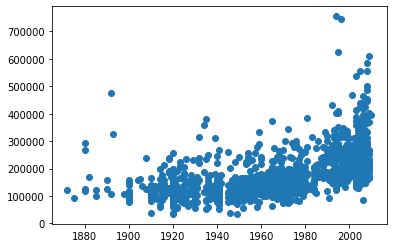

In [19]:
from minepy import MINE
x = df['YearBuilt']
y = df['SalePrice']
plt.scatter(x,y)

mine = MINE()

mine.compute_score(x, y)

mine.mic()

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

SalePrice-不動産の売却価格（ドル）ターゲット変数

MSSubClass：構築クラス
MSZoning：一般的なゾーニング分類
LotFrontage：プロパティに接続された通りの直線フィート
LotArea：平方フィート単位のロットサイズ
Street：道路アクセスの種類
LotShape：プロパティの一般的な形状
LandContour：プロパティの平坦度
ユーティリティ：利用可能なユーティリティの種類
LotConfig：ロット構成
LandSlope：プロパティの勾配
Neighborhood：エイムス市域内の物理的な場所
Condition1：主要道路または鉄道の近く
Condition2：主要道路または鉄道への近接性（1つ目が存在する場合）
BldgType：住居のタイプ
HouseStyle：住まいのスタイル
OverallQual：全体的な素材と仕上げの品質
OverallCond：全体的な状態の評価
YearBuilt：元の建設日
YearRemodAdd：改造日
RoofStyle：屋根のタイプ
RoofMatl：屋根材
Exterior1st：家の外装
Exterior2nd：家の外装（複数の素材の場合）
MasVnrType：石材突き板タイプ
MasVnrArea：平方フィートの石材突き板面積
ExterQual：外装材の品質
ExterCond：外装の素材の現状
Foundation：基礎の種類
BsmtQual：地下室の高さ
BsmtCond：地下室の一般的な状態
BsmtExposure：ウォークアウトまたは庭レベルの地下壁
BsmtFinType1：地下室完成エリアの品質
BsmtFinSF1：タイプ1完成した平方フィート
BsmtFinType2：2番目の終了エリアの品質（存在する場合）
BsmtFinSF2：タイプ2完成した平方フィート
BsmtUnfSF：地下室の未完成の平方フィート
TotalBsmtSF：地下室の総平方フィート
Heating：加熱のタイプ
HeatingQC：加熱品質と条件
CentralAir：セントラルエアコン
Electrical：電気システム
1stFlrSF：1階平方フィート
2ndFlrSF：2階平方フィート
LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）
GrLivArea：地上（地上）のリビングエリアの平方フィート
BsmtFullBath：地下室のフルバスルーム
BsmtHalfBath：地下半分のバスルーム
FullBath：グレード以上のフルバスルーム
HalfBath：グレードを超えるハーフバス
Bedroom：地下階以上のベッドルームの数
Kitchen：キッチンの数
KitchenQual：キッチンの品質
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）
Functional：ホーム機能の評価
Fireplaces：暖炉の数
FireplaceQu：暖炉の品質
GarageType：ガレージの場所
GarageYrBlt：ガレージが建設された年
GarageFinish：ガレージの内部仕上げ
GarageCars：車の容量におけるガレージのサイズ
GarageArea：平方フィート単位のガレージのサイズ
GarageQual：ガレージの品質
GarageCond：ガレージの状態
PavedDrive：舗装された私道
WoodDeckSF：平方フィートのウッドデッキエリア
OpenPorchSF：平方フィートのオープンポーチエリア
EnclosedPorch：平方フィートの囲われたポーチエリア
3SsnPorch：平方フィートの3シーズンポーチエリア
ScreenPorch：平方フィート単位のスクリーンポーチエリア
PoolArea：平方フィートのプールエリア
PoolQC：プールの品質
Fence：フェンスの品質
MiscFeature：その他の機能は他のカテゴリには含まれていません
MiscVal：その他の機能の$ Value
MoSold：販売月
YrSold：販売年
SaleType：販売のタイプ
SaleCondition：販売条件

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


説明変数。多量共線性は意識していない。

SalePrice-不動産の売却価格（ドル）ターゲット変数

MSSubClass：構築クラス
MSZoning：一般的なゾーニング分類
LotFrontage：プロパティに接続された通りの直線フィート
LotArea：平方フィート単位のロットサイズ
Street：道路アクセスの種類
Alley：路地へのアクセスの種類
LotShape：プロパティの一般的な形状
LandContour：プロパティの平坦度
ユーティリティ：利用可能なユーティリティの種類
LotConfig：ロット構成
LandSlope：プロパティの勾配
Neighborhood：エイムス市域内の物理的な場所
Condition1：主要道路または鉄道の近く
Condition2：主要道路または鉄道への近接性（1つ目が存在する場合）
BldgType：住居のタイプ
HouseStyle：住まいのスタイル
OverallQual：全体的な素材と仕上げの品質
OverallCond：全体的な状態の評価
YearBuilt：元の建設日
YearRemodAdd：改造日
RoofStyle：屋根のタイプ
RoofMatl：屋根材
Exterior1st：家の外装
Exterior2nd：家の外装（複数の素材の場合）
MasVnrType：石材突き板タイプ
MasVnrArea：平方フィートの石材突き板面積
ExterQual：外装材の品質
ExterCond：外装の素材の現状
Foundation：基礎の種類
BsmtQual：地下室の高さ
BsmtCond：地下室の一般的な状態
BsmtExposure：ウォークアウトまたは庭レベルの地下壁
BsmtFinType1：地下室完成エリアの品質
BsmtFinSF1：タイプ1完成した平方フィート
BsmtFinType2：2番目の終了エリアの品質（存在する場合）
BsmtFinSF2：タイプ2完成した平方フィート
BsmtUnfSF：地下室の未完成の平方フィート
TotalBsmtSF：地下室の総平方フィート
Heating：加熱のタイプ
HeatingQC：加熱品質と条件
CentralAir：セントラルエアコン
Electrical：電気システム
1stFlrSF：1階平方フィート
2ndFlrSF：2階平方フィート
LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）
GrLivArea：地上（地上）のリビングエリアの平方フィート
BsmtFullBath：地下室のフルバスルーム
BsmtHalfBath：地下半分のバスルーム
FullBath：グレード以上のフルバスルーム
HalfBath：グレードを超えるハーフバス
Bedroom：地下階以上のベッドルームの数
Kitchen：キッチンの数
KitchenQual：キッチンの品質
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）
Functional：ホーム機能の評価
Fireplaces：暖炉の数
FireplaceQu：暖炉の品質
GarageType：ガレージの場所
GarageYrBlt：ガレージが建設された年
GarageFinish：ガレージの内部仕上げ
GarageCars：車の容量におけるガレージのサイズ
GarageArea：平方フィート単位のガレージのサイズ
GarageQual：ガレージの品質
GarageCond：ガレージの状態
PavedDrive：舗装された私道
WoodDeckSF：平方フィートのウッドデッキエリア
OpenPorchSF：平方フィートのオープンポーチエリア
EnclosedPorch：平方フィートの囲われたポーチエリア
3SsnPorch：平方フィートの3シーズンポーチエリア
ScreenPorch：平方フィート単位のスクリーンポーチエリア
PoolArea：平方フィートのプールエリア
PoolQC：プールの品質
Fence：フェンスの品質
MiscFeature：その他の機能は他のカテゴリには含まれていません
MiscVal：その他の機能の$ Value
MoSold：販売月
YrSold：販売年
SaleType：販売のタイプ
SaleCondition：販売条件



MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [20]:
# df1 = df[['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]
# df1
df1=df

In [21]:
# sns.pairplot(df1)

In [22]:
# plt.figure(figsize=(10,5))
# plt.scatter(df['Id'], df['SalePrice'], color = 'blue')
# plt.title('SalePrice/number')
# plt.xlabel('number')
# plt.ylabel('Prices')
# plt.grid()
# plt.show()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [24]:
df1 = df1.dropna(axis=1)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [26]:
df1.isnull().all()

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 62, dtype: bool

欠損値はないので各項目を数値化する。

In [27]:
df1 = pd.get_dummies(df1)
df1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


学習を行う

In [28]:
clf = linear_model.LinearRegression()

df1_x = df1.drop("SalePrice", axis=1)
X_train = df1_x.as_matrix()
Y_train = df1['SalePrice'].as_matrix()

(X_train, X_test, Y_train, Y_test) = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 555)


clf.fit(X_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

学習用データ内でテストする。
決定係数で評価。

In [29]:
pred = clf.predict(X_test)

In [30]:
pred

array([220924.51239508, 310391.11227393, 406208.71917147, 114897.97695402,
       241335.82591221, 210799.7410287 , 275135.94321268, 189822.1529529 ,
       137935.36252387, 143072.79435821, 144810.71698715, 117776.91971534,
       183750.44234607, 323732.01597649, 131644.20154265, 212055.72717136,
       107739.02113462, 213521.42907718, 160450.04211875, 142615.42792842,
       241963.80558945, 173557.56264299, 113658.43604729, 175949.2997578 ,
       288334.89456779, 343104.12214874, 224165.7580688 , 194411.47760658,
       190129.2942678 , 115689.95674602, 224834.75079771, 161750.88722444,
       285652.11461263,  82077.84535882,  67613.00629756, 122940.02312297,
       126814.89161062, 217396.04744977, 125831.31927702, 209610.56000148,
       152121.39972703, 241068.84165525,  88519.33828172, 186673.05417232,
       198021.72183963, 152804.90233131,  73043.42852868, 111983.91974358,
       243087.48818607, 141922.01240219, 109518.12110644, 558413.06314127,
       126703.93915588, 1

In [31]:
from sklearn.metrics import r2_score
r2_score(Y_test,pred)

0.8259494242476252

In [32]:
X_test

array([[ 1349,    20, 16196, ...,     0,     1,     0],
       [ 1110,    20, 11362, ...,     0,     1,     0],
       [ 1354,    50, 14720, ...,     0,     1,     0],
       ...,
       [  547,    50,  8737, ...,     0,     1,     0],
       [ 1095,    20,  5868, ...,     0,     1,     0],
       [  185,    50,  7438, ...,     0,     1,     0]], dtype=int64)

In [33]:
Y_test

array([215000, 280000, 410000,  97000, 255000, 223500, 222000, 190000,
       142000, 130000, 143000, 131000, 185000, 274900, 149350, 215000,
       113000, 186500, 152000, 154000, 239000, 135000, 127000, 178000,
       260000, 325000, 222500, 184000, 170000, 134450, 185850, 153000,
       290000,  75500, 106250, 115000, 128000, 207500, 132500, 195400,
       135000, 224000,  89500, 158000, 191000, 154000, 107400, 143000,
       232000, 135960, 118500, 184750, 110000, 147000, 120500, 112000,
       204900, 274000, 186000, 141000, 145000, 157900, 192000, 149900,
       180500, 155000, 147000,  79900, 178000,  80000, 118000, 130250,
       125000, 216837, 183900, 197500, 556581, 151000, 157000, 108000,
       196000, 465000, 160000, 116000, 115000, 145000,  52500, 158500,
       165000, 113000, 119900,  86000, 143500, 116500, 165000, 257500,
       213500, 127000, 172500, 123000, 245000,  68400, 187000, 118500,
        89000, 143000, 335000, 256000, 236500,  98000, 162000, 127000,
      

In [34]:
graph_df1_x = df1.drop("SalePrice", axis=1)
graph_X = graph_df1_x.as_matrix()


graph_pred = clf.predict(graph_X)

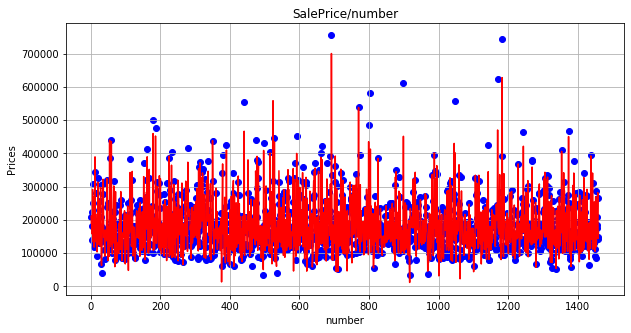

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(df['Id'], df['SalePrice'], color = 'blue')
plt.plot(df['Id'], graph_pred, color = 'red')

plt.title('SalePrice/number')
plt.xlabel('number')
plt.ylabel('Prices')
plt.grid()
plt.show()                              

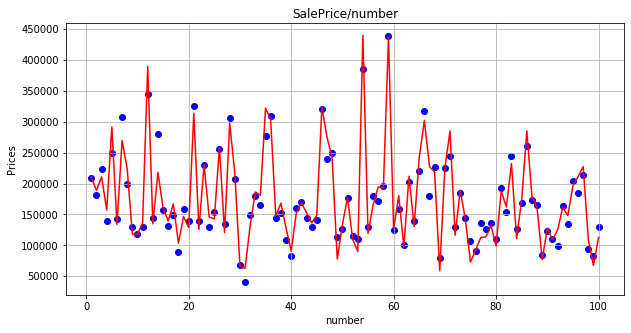

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(df['Id'].head(100), df['SalePrice'].head(100), color = 'blue')
plt.plot(df['Id'].head(100), graph_pred[:100], color = 'red')

plt.title('SalePrice/number')
plt.xlabel('number')
plt.ylabel('Prices')
plt.grid()
plt.show()       

かなり低い値ではあるがこのまま与えられたデータを予測する

In [37]:
df_test = pd.read_csv("input/test.csv")
# df_test2 = df_test[['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallCond', 'YearBuilt', 'YearRemodAdd']]
df_test2 = df_test.dropna(axis=1)
df_test2


,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


In [38]:
df_test2 = pd.get_dummies(df_test2)
df_test2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical_SBrkr,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,896,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,1329,0,0,...,1,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,928,701,0,...,1,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,926,678,0,...,1,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,1280,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,546,546,0,...,1,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,546,546,0,...,1,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224,0,0,...,1,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,970,0,0,...,1,0,0,1,0,0,0,0,1,0


たまたま項目が一致してるので、このまま予測を行う。

In [39]:
output = clf.predict(df_test2)

ValueError: shapes (1459,144) and (216,) not aligned: 144 (dim 1) != 216 (dim 0)

In [ ]:
output

In [ ]:
submit_data =  pd.Series(output, name='SalePrice', index=df_test['Id'])

In [ ]:
submit_data

In [ ]:
# submit_data.to_csv('submit.csv', header=True)